# Testing

Notebook for developing and testing the package. 

In [1]:
import sys
sys.path.append('../')
from fancy import *

In [2]:
# data
source_file = '../../uhecr_model/data/agn_catalog.dat'

my_data = Data()
my_data.add_source(source_file, 'AGN')

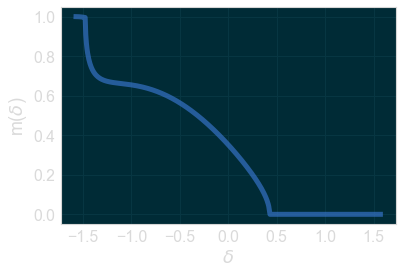

In [3]:
# detector 
auger_coords = [-35.5, -69.3] # lat, lon in degrees
threshold_zenith_angle = 60 # degrees
area = 3000 # km^2
total_exposure = 20370 # km^2 sr year

my_data.add_detector(auger_coords, threshold_zenith_angle, 
                  area, total_exposure, label = 'Auger')

# plot the exposure (this can take ~15 s to run...)
my_data.detector.show(view = 'decplot', cmap = 'vaporwave')

In [5]:
# model
model_name = '../../uhecr_model/stan/detection_effects.stan'
sim_name = '../../uhecr_model/stan/detection_effects_sim.stan'
my_model = Model(model_name, sim_name)

F_T = 0.2 # CR km^-2 year^-1
f = 0.5
kappa = 100
kappa_c = 1000

my_model.simulation_inputs(F_T, f, kappa, kappa_c)
my_model.compile()

Using cached StanModel
Using cached StanModel


In [6]:
# integral tables
table_file = 'test.data.R'
sim_table_file = 'test_sim.data.R'

my_analysis = Analysis(my_data, my_model)
#my_analysis.build_tables(10, table_file, sim_table_file)

In [7]:
# integral tables already built
my_analysis.use_tables(table_file, sim_table_file)

In [8]:
# simulate
#my_analysis.simulate()
#my_analysis.save_simulated_data('sim_data.data.R')
my_analysis.use_simulated_data('sim_data.data.R')

In [9]:
# plot
#my_analysis.plot_simulation()

In [10]:
# fit
my_fit = my_analysis.fit_model()

/Users/fran/projects/bayes/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


0 of 2000 iterations saturated the maximum tree depth of 10 (0.0%)
0.0 of 2000 iterations ended with a divergence (0.0%)
E-BFMI indicated no pathological behavior


In [11]:
print(my_fit)

Inference for Stan model: anon_model_c3c5b9c4edb62652d5f1ca45ce66ac93.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
F_T       0.22  2.7e-4   0.01    0.2   0.21   0.22   0.23   0.24   1482    1.0
f         0.51  7.4e-4   0.03   0.45   0.49   0.51   0.53   0.57   1481    1.0
kappa   114.71    0.69  17.95  89.93 102.89 111.24 122.97 164.43    673    1.0
kappa_c 1035.5   13.57 465.82  288.7 658.05 984.78 1394.1 1921.3   1178    1.0
F[0]    2.1e-3  3.0e-6 1.3e-4 1.8e-3 2.0e-3 2.1e-3 2.2e-3 2.3e-3   1909    nan
F[1]    1.9e-3  2.8e-6 1.2e-4 1.7e-3 1.9e-3 1.9e-3 2.0e-3 2.2e-3   1909    nan
F[2]    2.9e-3  4.2e-6 1.8e-4 2.5e-3 2.8e-3 2.9e-3 3.0e-3 3.3e-3   1909    nan
F[3]    2.3e-3  3.4e-6 1.5e-4 2.0e-3 2.2e-3 2.3e-3 2.4e-3 2.6e-3   1909    nan
F[4]    3.3e-3  4.8e-6 2.1e-4 2.9e-3 3.2e-3 3.3e-3 3.4e-3 3.7e-3   1909    nan
F[5]    2.8e-3  4.1e-6 